In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import ffn 

In [2]:
data = pd.read_csv('data.csv', index_col = 'Date') 
data.shape

(2457, 8)

In [3]:
# Stock Indicators 
# 1. Standard Deviation 
data['Std'] = data['Adj Close'].rolling(window = 100).std() 
# 2. Simple Moving Average 
data['SMA'] = data['Adj Close'].rolling(window = 100).mean() 
data.tail(10) 

,Open,High,Low,Close,Adj Close,Volume,Returns,Target,Std,SMA
Date,,,,,,,,,,
2019-09-23,1777.00,1792.70,1767.32,1785.30,1785.30,2922300,-0.004950,-1,75.792297,1862.4721
2019-09-24,1790.61,1795.71,1735.55,1741.61,1741.61,4616000,-0.024776,-1,76.646002,1860.8800
2019-09-25,1747.36,1773.00,1723.00,1768.33,1768.33,3493200,0.015226,1,76.505529,1858.9387
2019-09-26,1762.79,1763.37,1731.50,1739.84,1739.84,3536800,-0.016242,-1,76.857758,1856.8316
2019-09-27,1748.00,1749.12,1713.82,1725.45,1725.45,3907200,-0.008305,-1,77.691798,1854.8761
2019-09-30,1726.99,1737.46,1709.22,1735.91,1735.91,2644700,0.006044,1,78.330566,1853.0575
2019-10-01,1746.00,1755.60,1728.41,1735.65,1735.65,3084500,-0.000150,-1,79.057294,1851.4153
2019-10-02,1727.74,1728.89,1705.00,1713.23,1713.23,3301100,-0.013002,-1,80.154589,1849.6478
2019-10-03,1713.00,1725.00,1685.06,1724.42,1724.42,3468200,0.006510,1,81.085392,1848.6652


In [4]:
# 3. Bollinger Bands 
# https://www.bollingerbands.com/bollinger-bands 
data['bb_upper'] = data.SMA + (data.Std * 2) 
data['bb_lower'] = data.SMA + (data.Std * 2) 

# 4. Moving Average Convergence/Divergence 
# https://www.investopedia.com/terms/m/macd.asp 
data['MACD'] = data['Adj Close'].ewm(span = 12).mean() - data['Adj Close'].ewm(span = 26).mean() 
data['MACD_Threshold'] = data['MACD'].ewm(span = 9).mean() 
data['MACD_Crossover'] = data.MACD - data.MACD_Threshold

# 4. Relative Strength Index
def rsi_timeseries(prices, n=14):
    deltas = (prices-prices.shift(1)).fillna(0)
    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1

    return rsi_series

data['RSI'] = rsi_timeseries(data['Adj Close'])  

data['Returns'].fillna(0) 
# 5. Momentem, Calculated weekly 
data['mom'] = np.sign(data['Returns'].rolling(5).mean()) 
data.tail(10) 

C:\Users\siddh\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Adj Close,Volume,Returns,Target,Std,SMA,bb_upper,bb_lower,MACD,MACD_Threshold,MACD_Crossover,RSI,mom
Date,,,,,,,,,,,,,,,,,
2019-09-23,1777.00,1792.70,1767.32,1785.30,1785.30,2922300,-0.004950,-1,75.792297,1862.4721,2014.056693,2014.056693,-5.506829,-5.443377,-0.063452,42.498420,-1.0
2019-09-24,1790.61,1795.71,1735.55,1741.61,1741.61,4616000,-0.024776,-1,76.646002,1860.8800,2014.172005,2014.172005,-10.594055,-6.473512,-4.120543,35.151727,-1.0
2019-09-25,1747.36,1773.00,1723.00,1768.33,1768.33,3493200,0.015226,1,76.505529,1858.9387,2011.949758,2011.949758,-12.327534,-7.644317,-4.683217,41.780411,-1.0
2019-09-26,1762.79,1763.37,1731.50,1739.84,1739.84,3536800,-0.016242,-1,76.857758,1856.8316,2010.547116,2010.547116,-15.817894,-9.279032,-6.538862,37.391629,-1.0
2019-09-27,1748.00,1749.12,1713.82,1725.45,1725.45,3907200,-0.008305,-1,77.691798,1854.8761,2010.259695,2010.259695,-19.520166,-11.327259,-8.192907,35.370626,-1.0
2019-09-30,1726.99,1737.46,1709.22,1735.91,1735.91,2644700,0.006044,1,78.330566,1853.0575,2009.718633,2009.718633,-21.363938,-13.334595,-8.029344,37.994126,-1.0
2019-10-01,1746.00,1755.60,1728.41,1735.65,1735.65,3084500,-0.000150,-1,79.057294,1851.4153,2009.529888,2009.529888,-22.585766,-15.184829,-7.400937,37.952886,-1.0
2019-10-02,1727.74,1728.89,1705.00,1713.23,1713.23,3301100,-0.013002,-1,80.154589,1849.6478,2009.956977,2009.956977,-25.074142,-17.162692,-7.911450,34.477605,-1.0
2019-10-03,1713.00,1725.00,1685.06,1724.42,1724.42,3468200,0.006510,1,81.085392,1848.6652,2010.835984,2010.835984,-25.845328,-18.899219,-6.946110,37.551211,-1.0


In [5]:
pred = pd.read_csv('Deep_Learning_Prediction.csv', index_col=0)  
pred.shape 

(486, 2)

In [6]:
pred.index = data[-pred.shape[0]:].index   

In [7]:
close = data['Adj Close'][-pred.shape[0]:]  
sma = data['SMA'][-pred.shape[0]:] 
mom = data['mom'][-pred.shape[0]:] 
rsi = data['RSI'][-pred.shape[0]:] 
macd = data['MACD_Crossover'][-pred.shape[0]:] 
bb_upper = data['bb_upper'][-pred.shape[0]:]
bb_lower = data['bb_lower'][-pred.shape[0]:]  

In [8]:
# Buying indicators
buy1 = close > sma
buy2 = mom > 0
buy3 = rsi < 55
buy4 = macd > 0 
BUY = buy1 | buy2 | buy3 | buy4   

In [9]:
# selling indicators
sell1 = close < sma
sell2 = mom < 0 
sell3 = rsi > 50
sell4 = macd < 0 
SELL = sell1 | sell2 | sell3 | sell4 

In [10]:
filter1 = (pred.iloc[:,0]  > 0.57) 
filter2 = (pred.iloc[:,1] < 0.41)
filter3 = BUY > 0 
filter4 = SELL > 0  

In [11]:
indicators = pd.concat([pred, filter1, filter2, filter3, filter4], axis = 1)  
indicators.columns = ['Pred 1st Column','Pred 2nd Column', 'Filter1','Filter2', 'Filter3', 'Filter4'] 

In [12]:
indicators['Signal'] = np.where(indicators['Filter1'] & indicators['Filter3'],1,0)
indicators['Signal'] = np.where(indicators['Filter2'] & indicators['Filter4'],-1,indicators['Signal']) 

In [13]:
indicators.head(10) 

,Pred 1st Column,Pred 2nd Column,Filter1,Filter2,Filter3,Filter4,Signal
Date,,,,,,,
2017-10-30,0.504266,0.495734,False,False,True,True,0
2017-10-31,0.445200,0.554800,False,False,True,True,0
2017-11-01,0.450896,0.549104,False,False,True,True,0
2017-11-02,0.451028,0.548972,False,False,True,True,0
2017-11-03,0.493351,0.506649,False,False,True,True,0
2017-11-06,0.522415,0.477585,False,False,True,True,0
2017-11-07,0.418436,0.581564,False,False,True,True,0
2017-11-08,0.468041,0.531959,False,False,True,True,0
2017-11-09,0.499113,0.500887,False,False,True,True,0


In [14]:
buys = indicators.loc[indicators['Signal'] == 1]
sells = indicators.loc[indicators['Signal'] == -1]  

In [15]:
stock_price = pd.DataFrame(data.iloc[-pred.shape[0]:, 4].values) 

In [16]:
def backtest(data) : 
    investment = 100000 
    initial = 0 
    total = 0 
    equity = list() 
    data['Total'] = 100000 
    stock = 50
    
    for row in data.iterrows() : 
        price = float(row[1][0])
        signal = indicators.iloc[row[0]][-1] 
        # BUYING
        if(signal > 0 and investment - stock * price > 0 ) : 
            investment = investment - stock * price 
            initial = initial + stock 
        elif(signal < 0 and abs(initial * price) < investment) : 
            investment = investment + stock * price 
            initial = initial - stock 
        equity.append(float(initial * price + investment)) 
    equity_data = pd.DataFrame(equity, columns = ['Equity']) 
    return equity_data 

In [17]:
equity = backtest(stock_price) 
equity.index = indicators.index 
print('Current Equity = ', equity.iloc[-1][0])       

Current Equity =  130285.0


In [18]:
equity.index = pd.to_datetime(equity.index) 
perf = equity.Equity.calc_stats()  

C:\Users\siddh\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


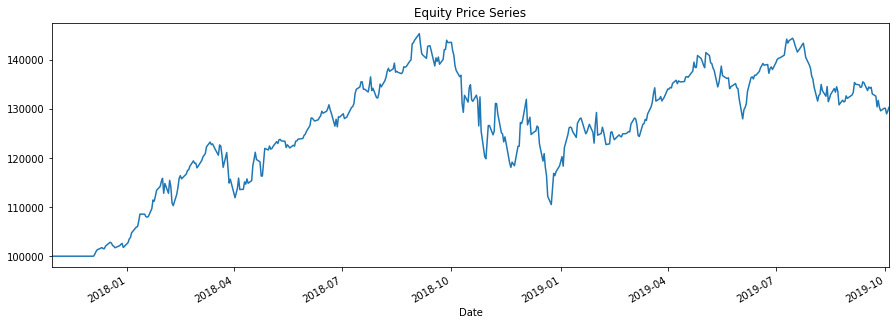

In [19]:
perf.plot();

In [20]:
perf.display() 

Stats for Equity from 2017-10-30 00:00:00 - 2019-10-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
30.29%              0.79  14.71%  -23.94%

Annualized Returns:
mtd    3m      6m      ytd     1y      3y      5y    10y    incep.
-----  ------  ------  ------  ------  ------  ----  -----  --------
0.14%  -7.11%  -2.95%  10.04%  -6.12%  14.71%  -     -      14.71%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.79     0.75       2.96
mean    15.71%   15.28%     13.19%
vol     19.78%   20.25%     4.45%
skew    -0.22    -0.40      -
kurt    3.00     1.30       -
best    5.74%    13.83%     16.33%
worst   -5.26%   -14.12%    10.04%

Drawdowns:
max      avg       # days
-------  ------  --------
-23.94%  -3.02%     32.06

Misc:
---------------  -------
avg. up month    4.96%
avg. down month  -3.88%
up year %        100.00%
12m up %        

In [21]:
# display monthly returns
perf.return_table.T   

,2017,2018,2019
Jan,0.00000,0.138255,0.091536
Feb,0.00000,0.026570,-0.030525
Mar,0.00000,-0.027374,0.056236
Apr,0.00000,0.051349,0.055074
May,0.00000,0.026104,-0.054233
Jun,0.00000,0.028121,0.044890
Jul,0.00000,0.030259,-0.009729
Aug,0.00000,0.089000,-0.033112
Sep,0.00000,-0.003373,-0.015282
Oct,0.00000,-0.141158,0.001437


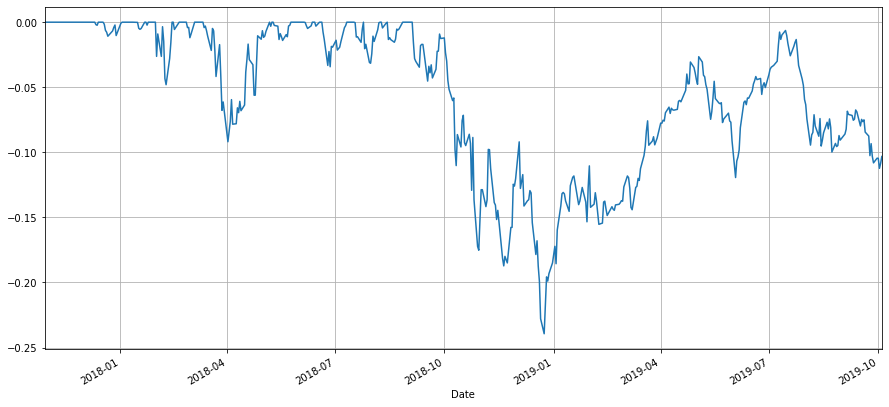

In [22]:
# plotting visual representation of strategy drawdown series:
ffn.to_drawdown_series(equity['Equity']).plot(figsize=(15,7),grid=True)
plt.show() 

C:\Users\siddh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


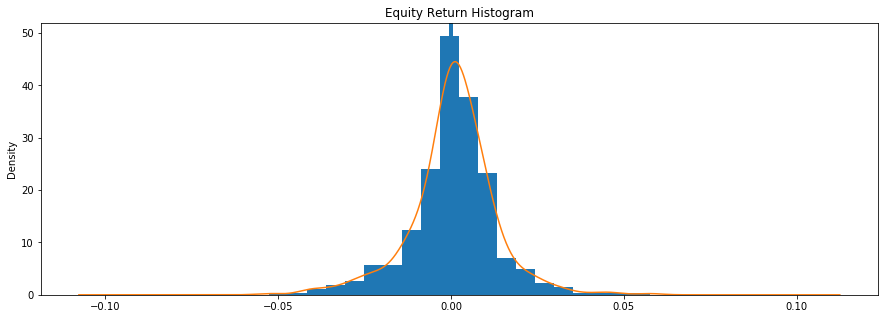

In [23]:
perf.plot_histogram();  

In [24]:
perf.display_lookback_returns() 

mtd       0.14%
3m       -7.11%
6m       -2.95%
ytd      10.04%
1y       -6.12%
3y       14.71%
5y         nan%
10y        nan%
incep    14.71%
Name: Equity, dtype: object